In [125]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [126]:
ds=pd.read_csv(r"E:\dataset.csv")
ds.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [127]:
ds.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [128]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [129]:
ds.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Axes: >

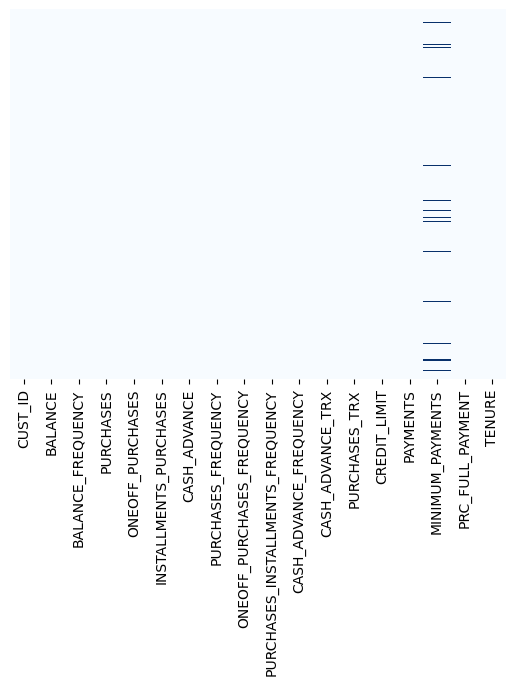

In [130]:
#highlights null values
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [131]:
ds.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [132]:
ds.loc[(ds['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=ds['MINIMUM_PAYMENTS'].mean()

In [133]:
ds.loc[(ds['CREDIT_LIMIT'].isnull() ==True),'CREDIT_LIMIT']=ds['CREDIT_LIMIT'].mean()


In [134]:
ds.duplicated().sum()

0

In [135]:
ds.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [136]:
ds.drop("CUST_ID",axis =1,inplace =True)

In [137]:
n=len(ds.columns)
n

17

In [138]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

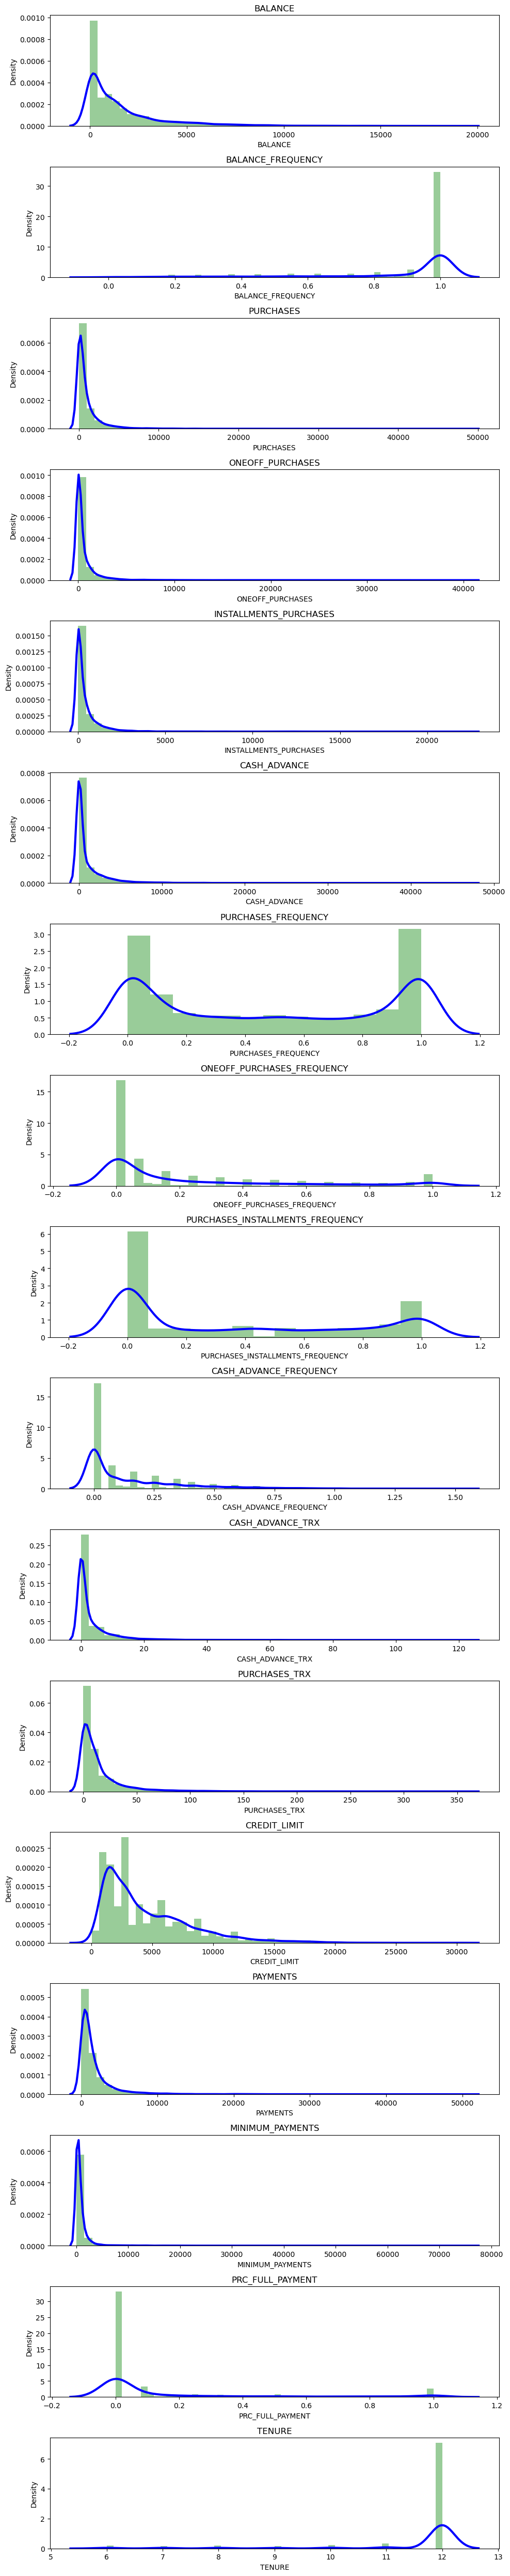

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,50))
for i in range(len(ds.columns)):
    plt.subplot(17,1,i+1)#row,,column,index
    sns.distplot(ds[ds.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
    plt.title(ds.columns[i])
plt.tight_layout()

In [140]:
correlations=ds.corr()

In [141]:
ds

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<Axes: >

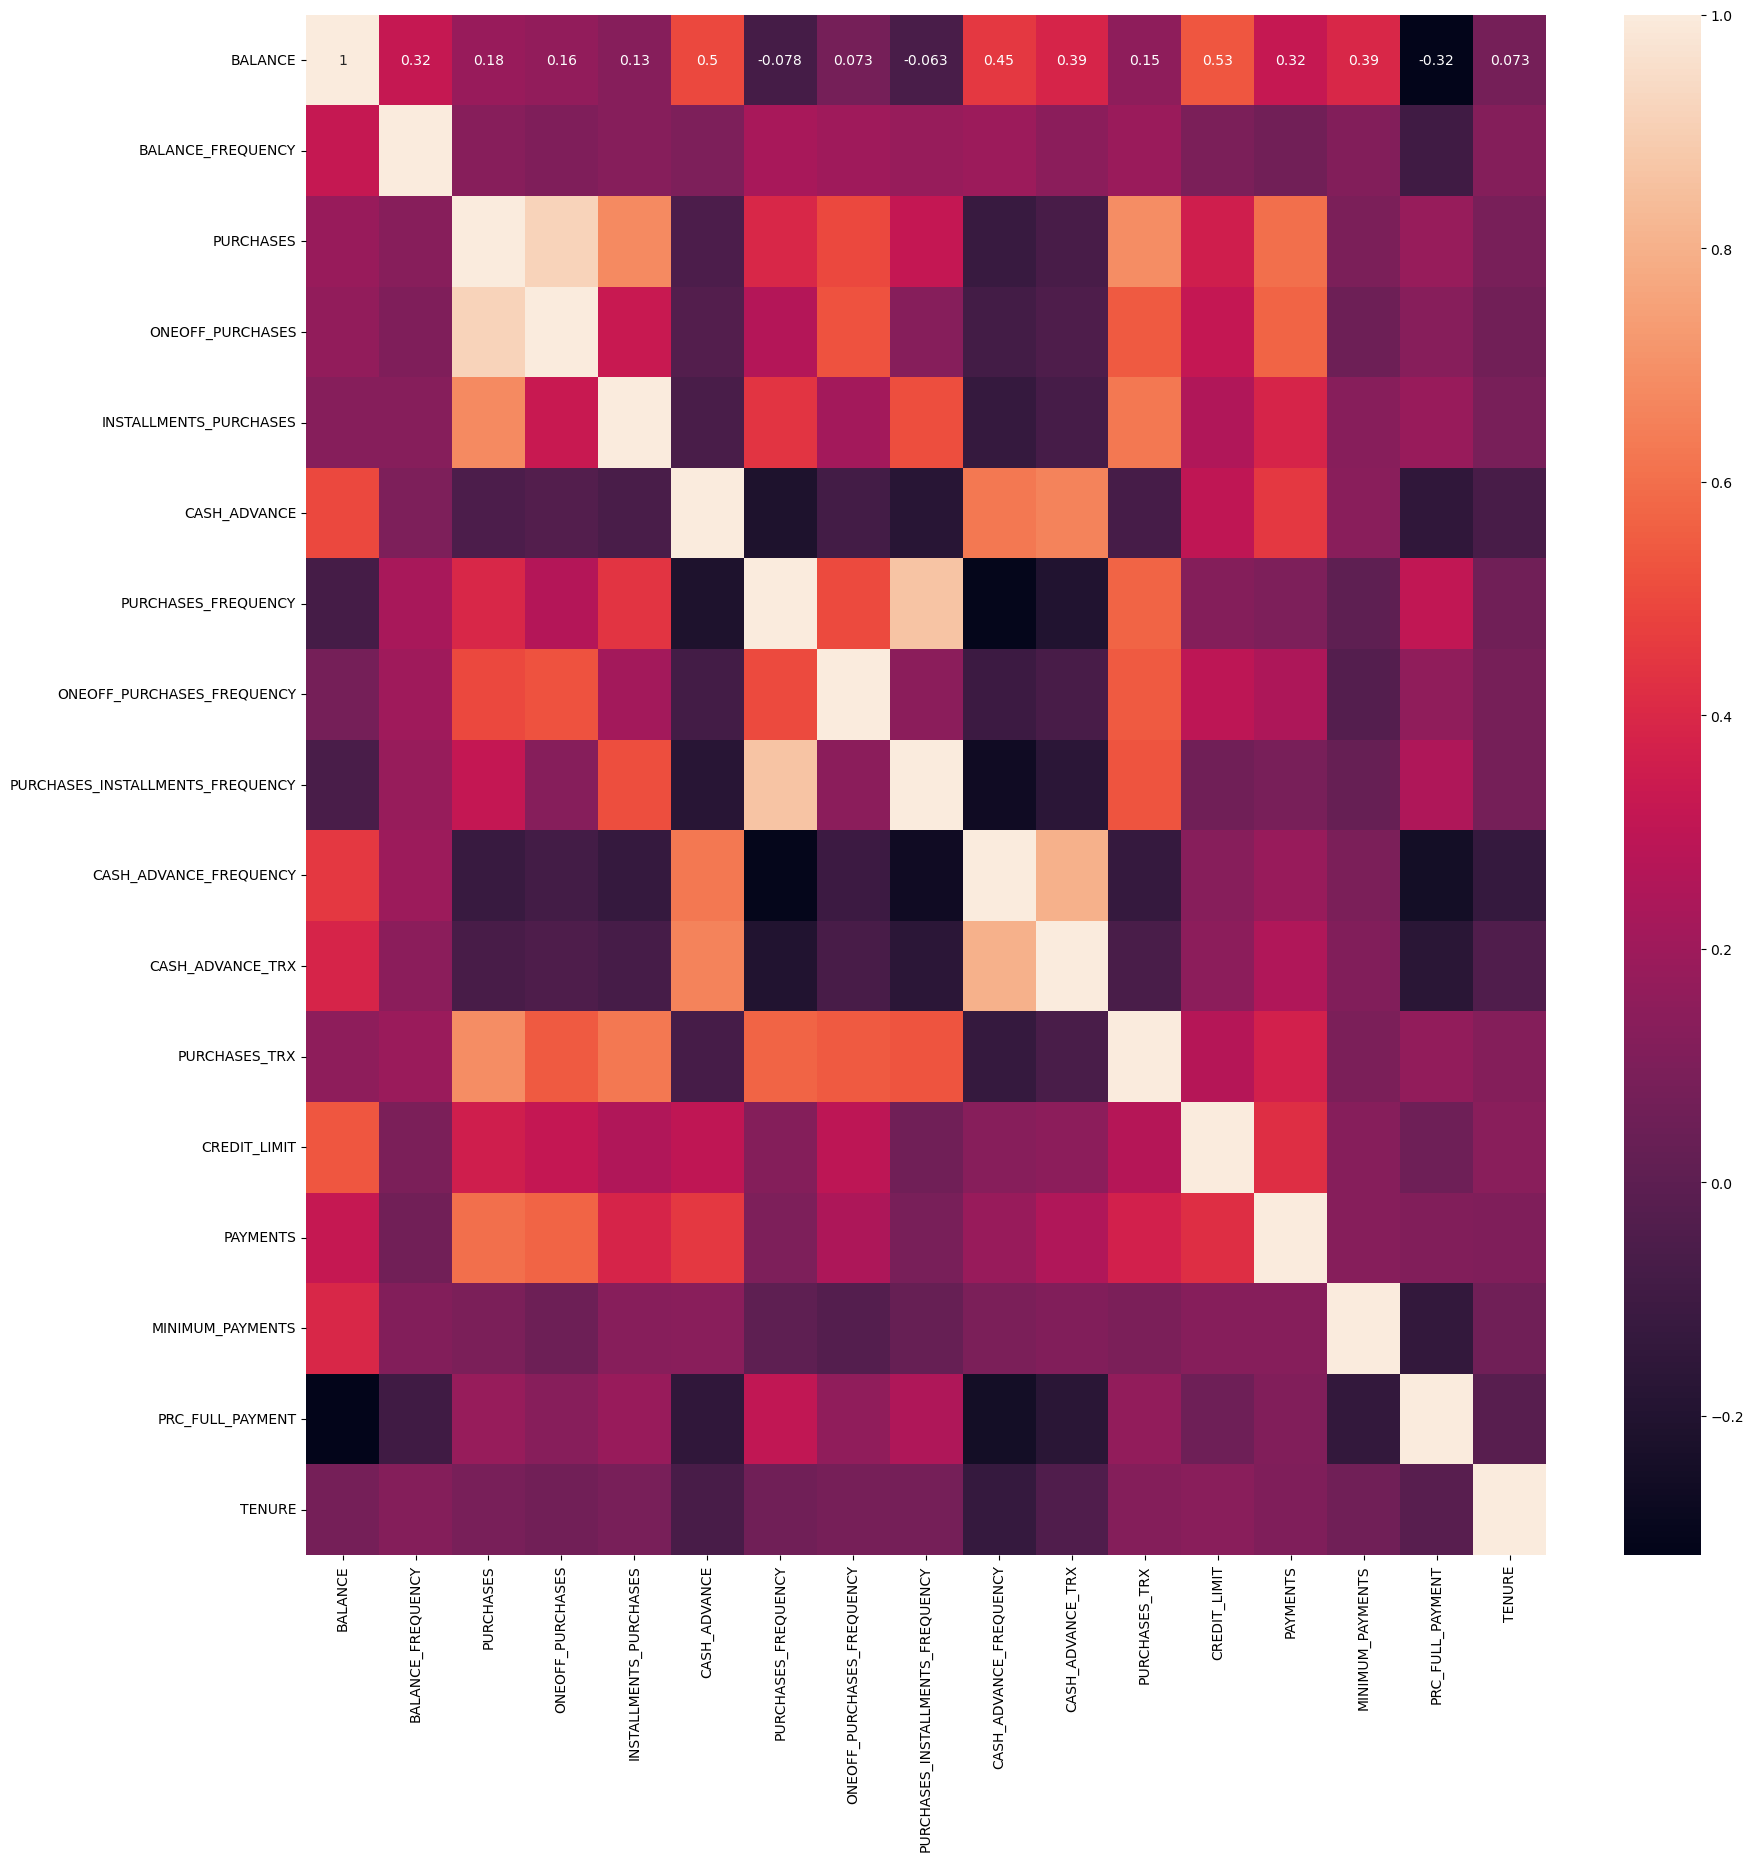

In [142]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [143]:
scaler=StandardScaler()
ds_scaled=scaler.fit_transform(ds)

In [144]:
ds_scaled.shape

(8950, 17)

In [145]:
ds_scaled #scaling the values between 0 and 1

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

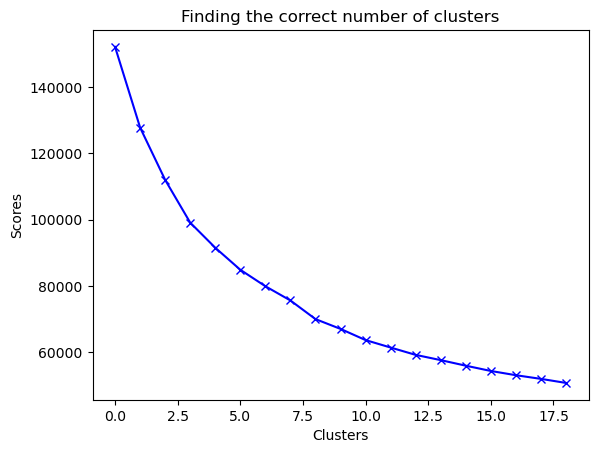

In [146]:
#taking empty list
scores_1=[]
#iterate k values from 1 to 20
#The values of wcss stored in list
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(ds_scaled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1,'bx-')
plt.title("Finding the correct number of clusters")
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [147]:
#number of clusters=8
#each datapoint has a label assigned representing the cluster it belongs to
kmeans=KMeans(8)
kmeans.fit(ds_scaled)
labels=kmeans.labels_

In [148]:
kmeans.cluster_centers_

array([[ 1.48410439e-02,  4.02141867e-01, -3.45497042e-01,
        -2.26283212e-01, -4.01090497e-01, -9.58700203e-02,
        -8.17260052e-01, -3.38413896e-01, -7.58622214e-01,
         9.75738098e-02, -3.21613298e-02, -4.67317803e-01,
        -2.96677177e-01, -2.44776321e-01, -4.22326860e-02,
        -4.52790111e-01,  2.71105725e-01],
       [ 1.41901256e-01,  4.30008263e-01,  9.50470943e-01,
         9.01022256e-01,  5.92018445e-01, -3.04923478e-01,
         1.09332667e+00,  1.86756498e+00,  5.38153434e-01,
        -4.05661806e-01, -3.15824958e-01,  1.20485487e+00,
         7.08653326e-01,  3.99186620e-01, -4.72139325e-02,
         4.54813506e-01,  3.07808706e-01],
       [-3.78372498e-01,  3.31201706e-01, -4.31944889e-02,
        -2.31928562e-01,  3.23794512e-01, -3.68857186e-01,
         9.72029294e-01, -3.48847942e-01,  1.16067207e+00,
        -4.77696868e-01, -3.63168606e-01,  1.64031297e-01,
        -2.76257136e-01, -2.25917412e-01, -9.74880034e-02,
         3.06630754e-01,  2.5

In [149]:
kmeans.cluster_centers_.shape#centroid  8clusters

(8, 17)

In [150]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[ds.columns])
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.014841,0.402142,-0.345497,-0.226283,-0.401090,-0.095870,-0.817260,-0.338414,-0.758622,0.097574,-0.032161,-0.467318,-0.296677,-0.244776,-0.042233,-0.452790,0.271106
1,0.141901,0.430008,0.950471,0.901022,0.592018,-0.304923,1.093327,1.867565,0.538153,-0.405662,-0.315825,1.204855,0.708653,0.399187,-0.047214,0.454814,0.307809
2,-0.378372,0.331202,-0.043194,-0.231929,0.323795,-0.368857,0.972029,-0.348848,1.160672,-0.477697,-0.363169,0.164031,-0.276257,-0.225917,-0.097488,0.306631,0.252162
3,1.669661,0.394220,-0.199456,-0.146069,-0.203342,2.032318,-0.447727,-0.182732,-0.396984,1.946962,1.963880,-0.232551,1.023173,0.857306,0.395015,-0.387940,0.063511
4,-0.337794,-0.349455,-0.284231,-0.208737,-0.288211,0.065446,-0.197106,-0.271926,-0.229662,0.302135,-0.002861,-0.385258,-0.557568,-0.390736,-0.209560,0.013756,-3.195855


In [151]:
#reverse of scaler
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[ds.columns])
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1595.365208,0.972534,265.045078,216.853586,48.366485,777.827201,0.162345,0.101502,0.062941,0.154670,3.029349,3.094059,3415.016502,1024.540386,765.785049,0.021281,11.880127
1,1859.830315,0.979136,3033.900653,2087.949772,946.422579,339.432336,0.929155,0.759589,0.578313,0.053967,1.093553,44.658019,7072.820183,2888.750005,754.176464,0.286740,11.929245
2,776.924412,0.955729,910.919142,207.483460,703.871004,205.360364,0.880473,0.098390,0.825718,0.039552,0.770468,18.787037,3489.312964,1079.135079,637.014863,0.243399,11.854776
3,5039.732557,0.970658,577.063595,349.992890,227.188243,5240.736449,0.310656,0.147945,0.206666,0.524751,16.650867,8.929480,8217.172885,4214.960237,1784.772963,0.040249,11.602312
4,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2465.787340,602.000784,375.834865,0.157738,7.240446


In [152]:
labels.shape

(8950,)

In [153]:
labels.max()

7

In [154]:
labels.min()

0

In [155]:
labels

array([0, 3, 1, ..., 4, 4, 4])

In [156]:
ds_cluster=pd.concat([ds,pd.DataFrame({"cluster":labels})],axis=1)
ds_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


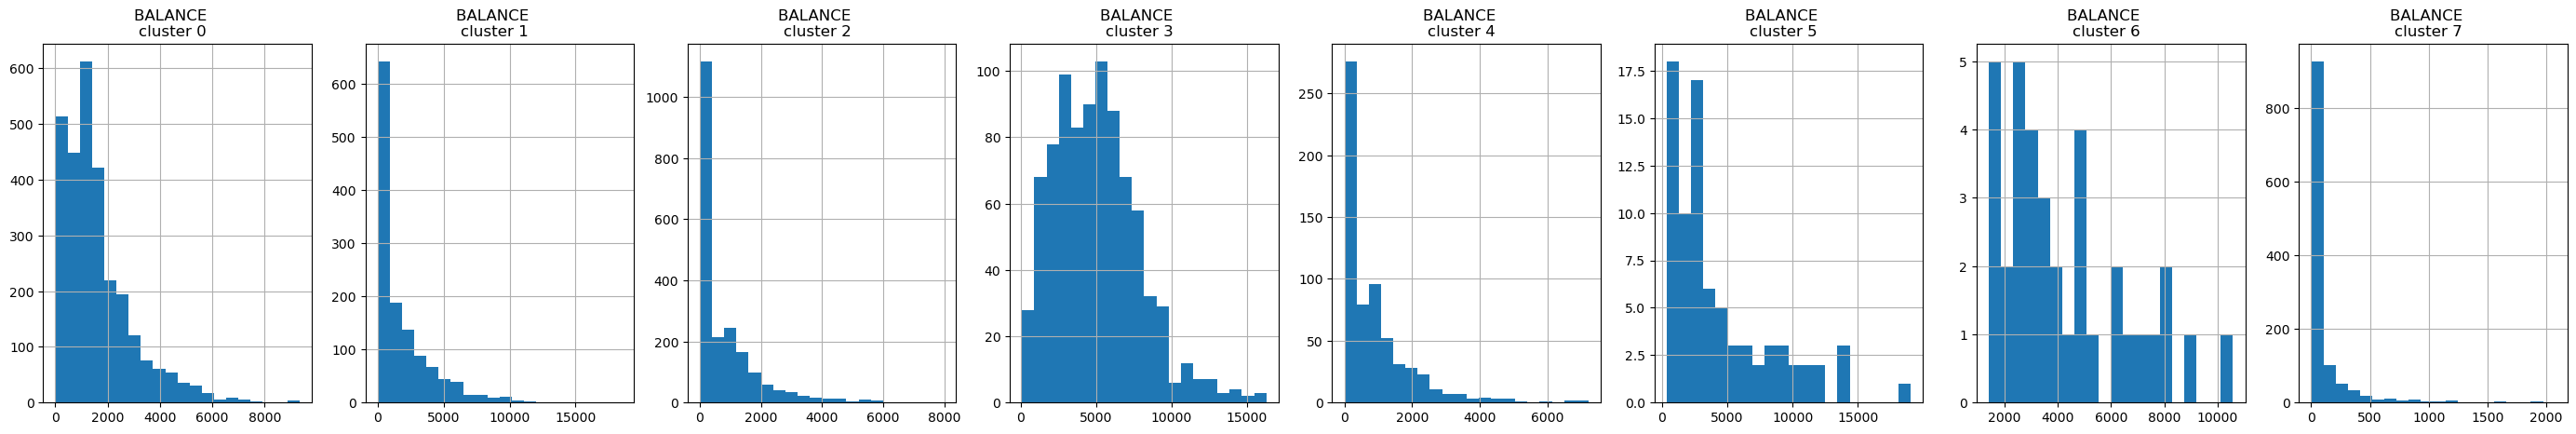

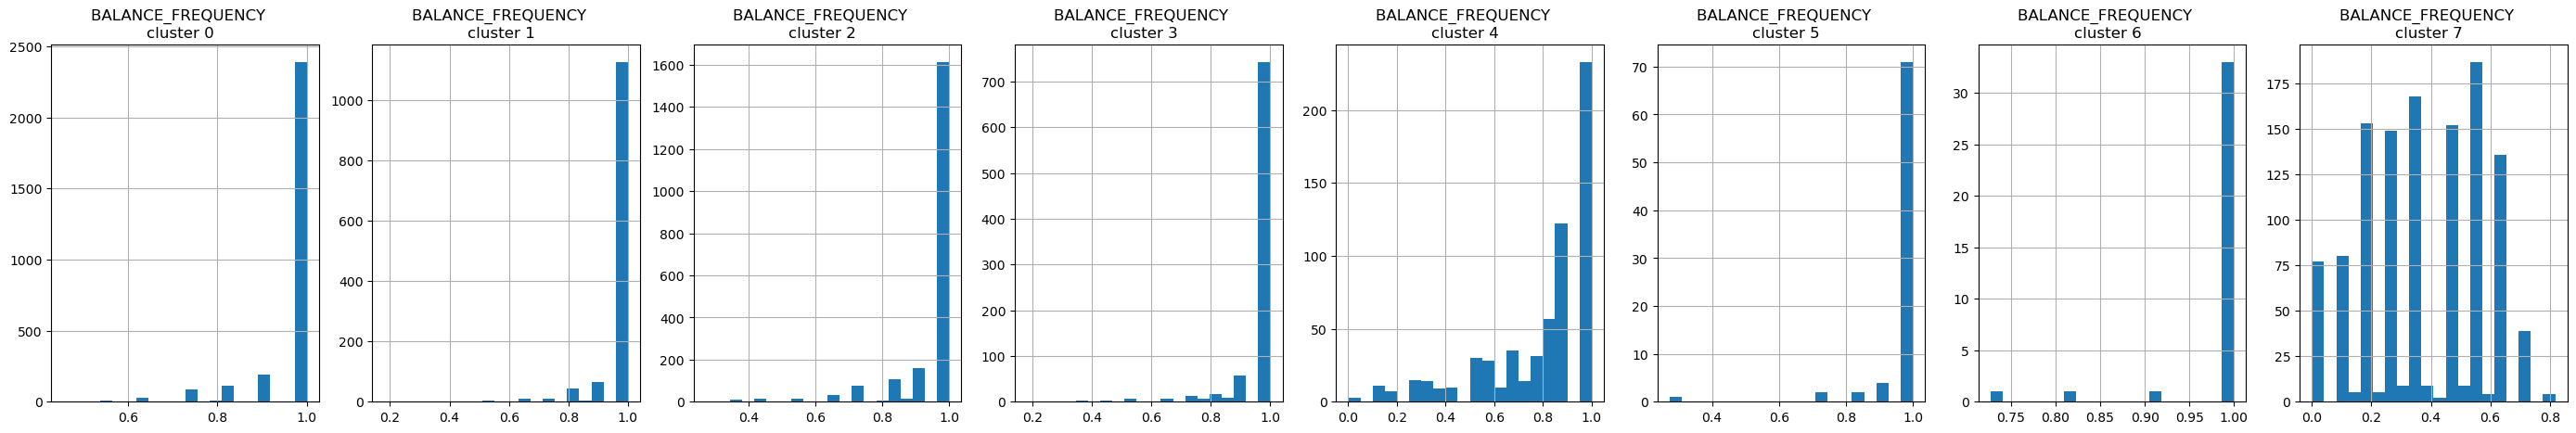

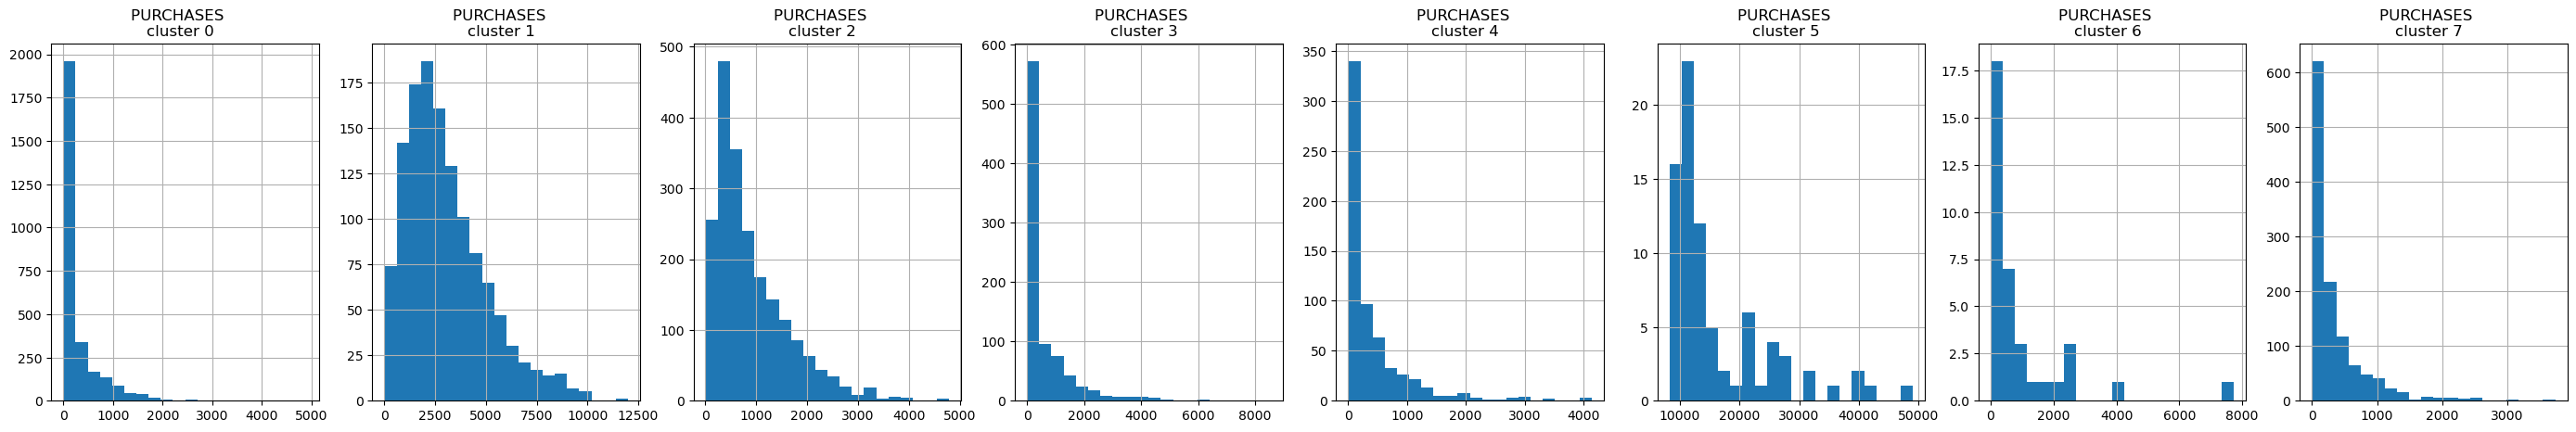

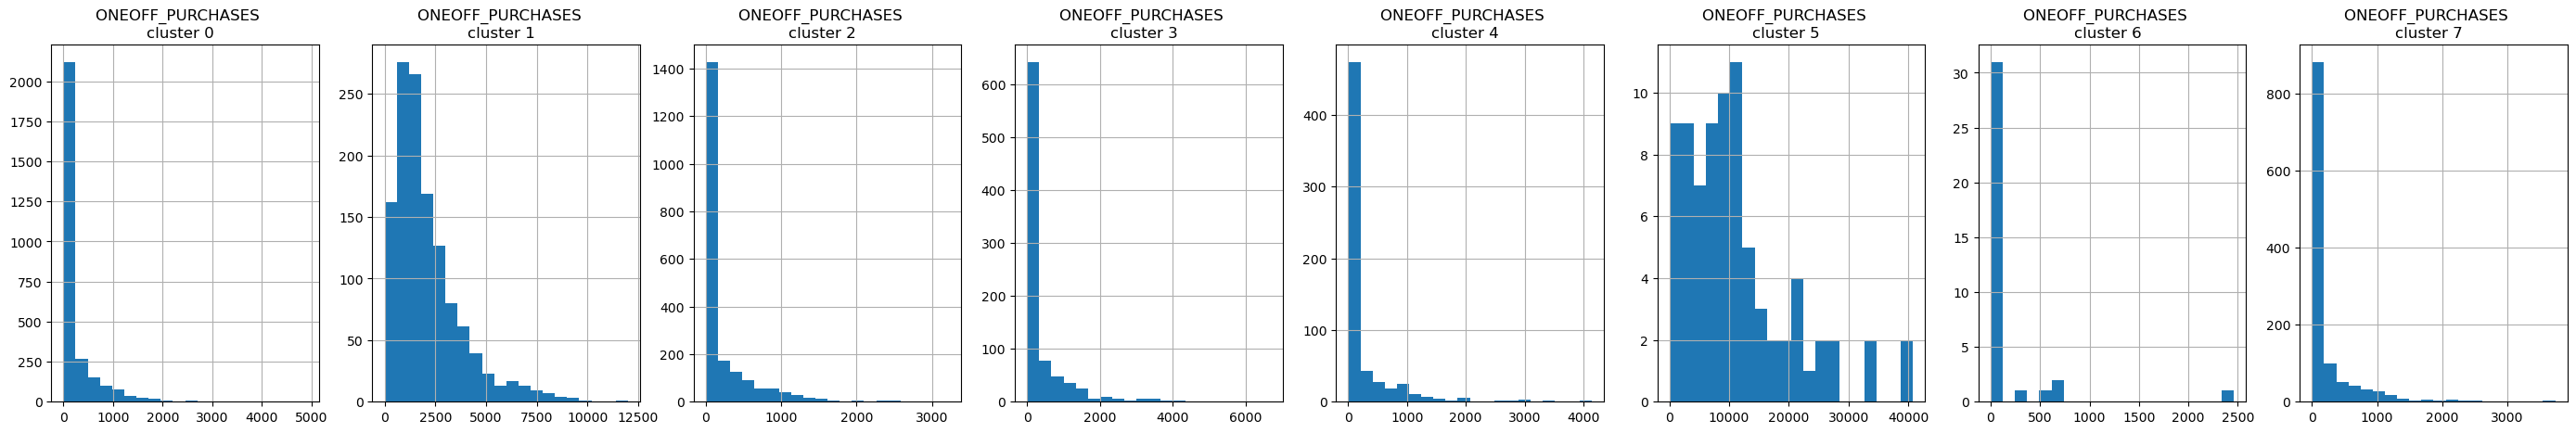

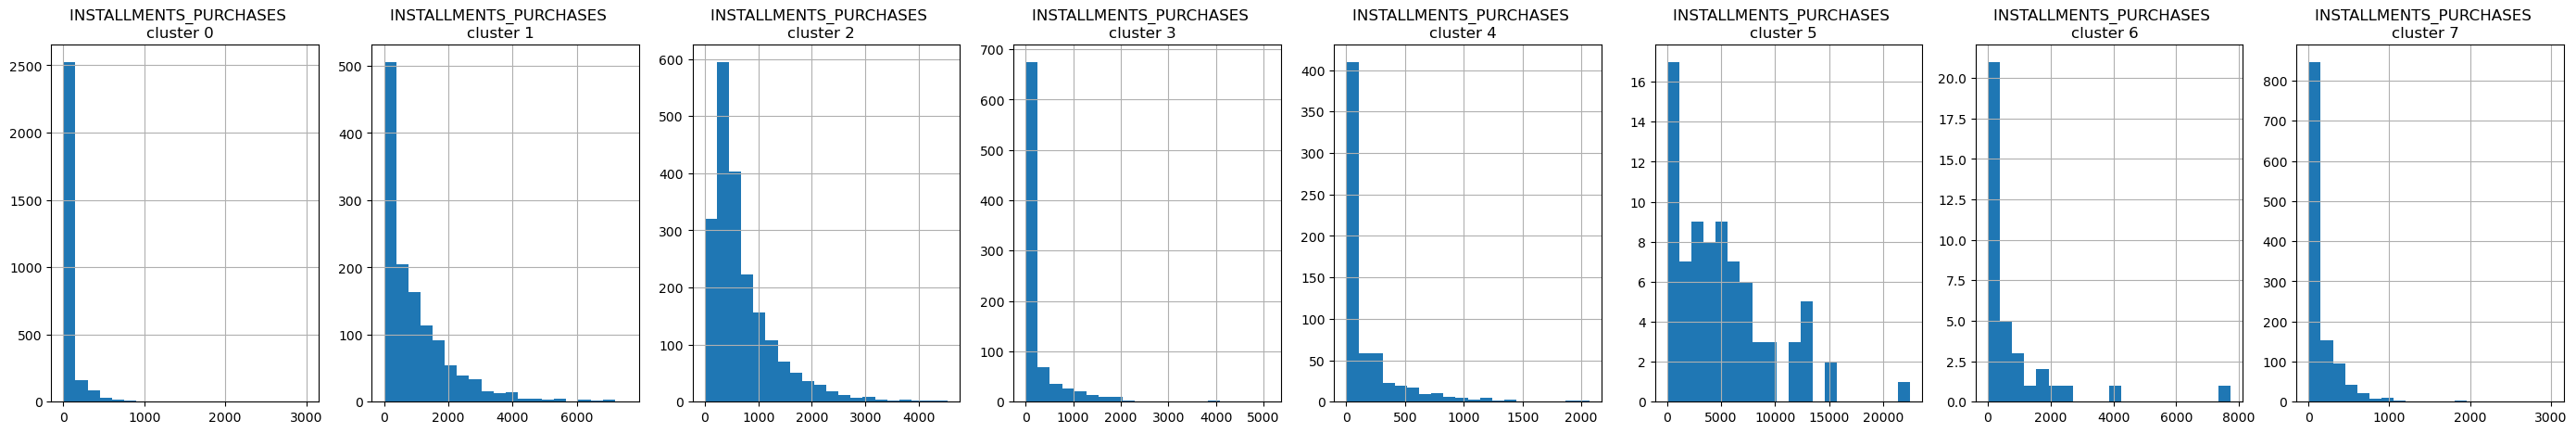

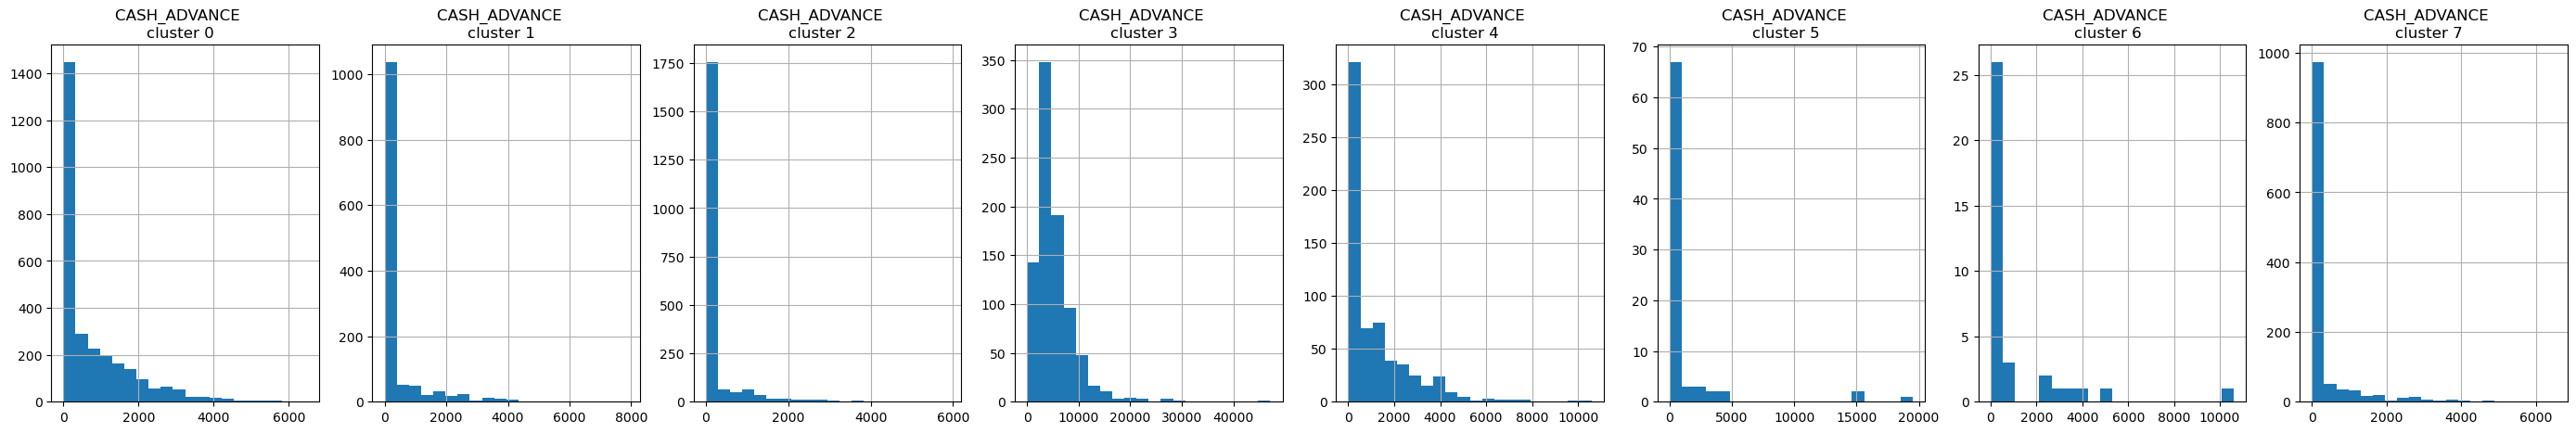

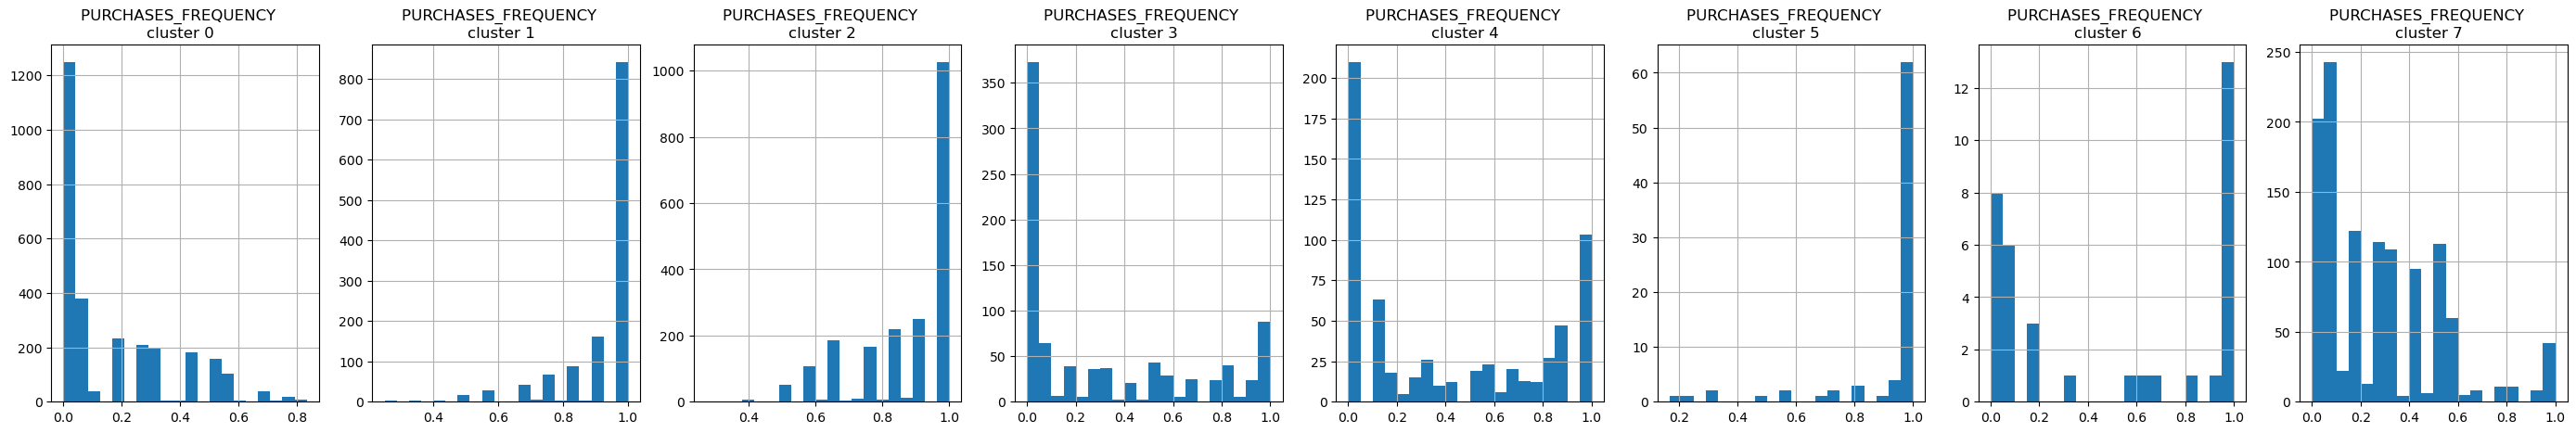

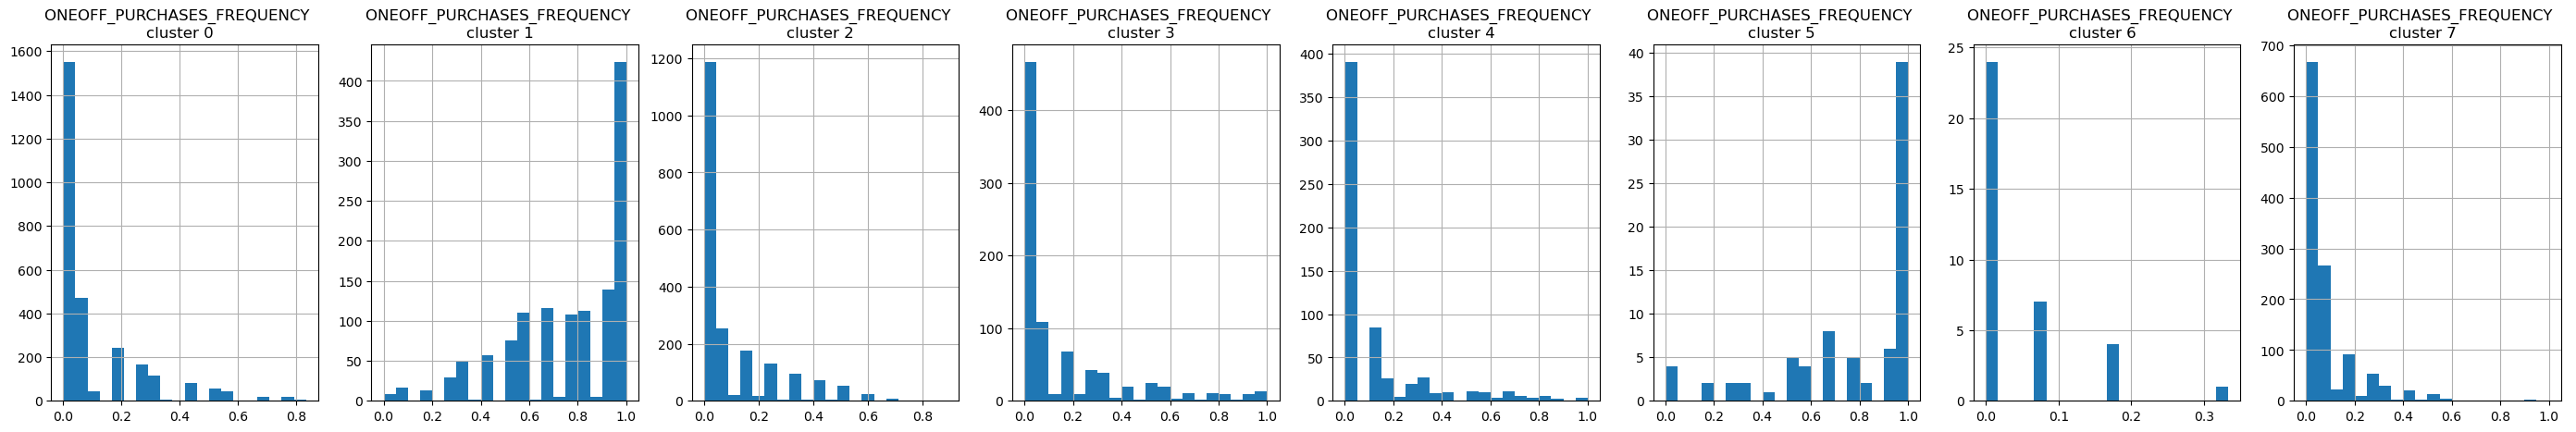

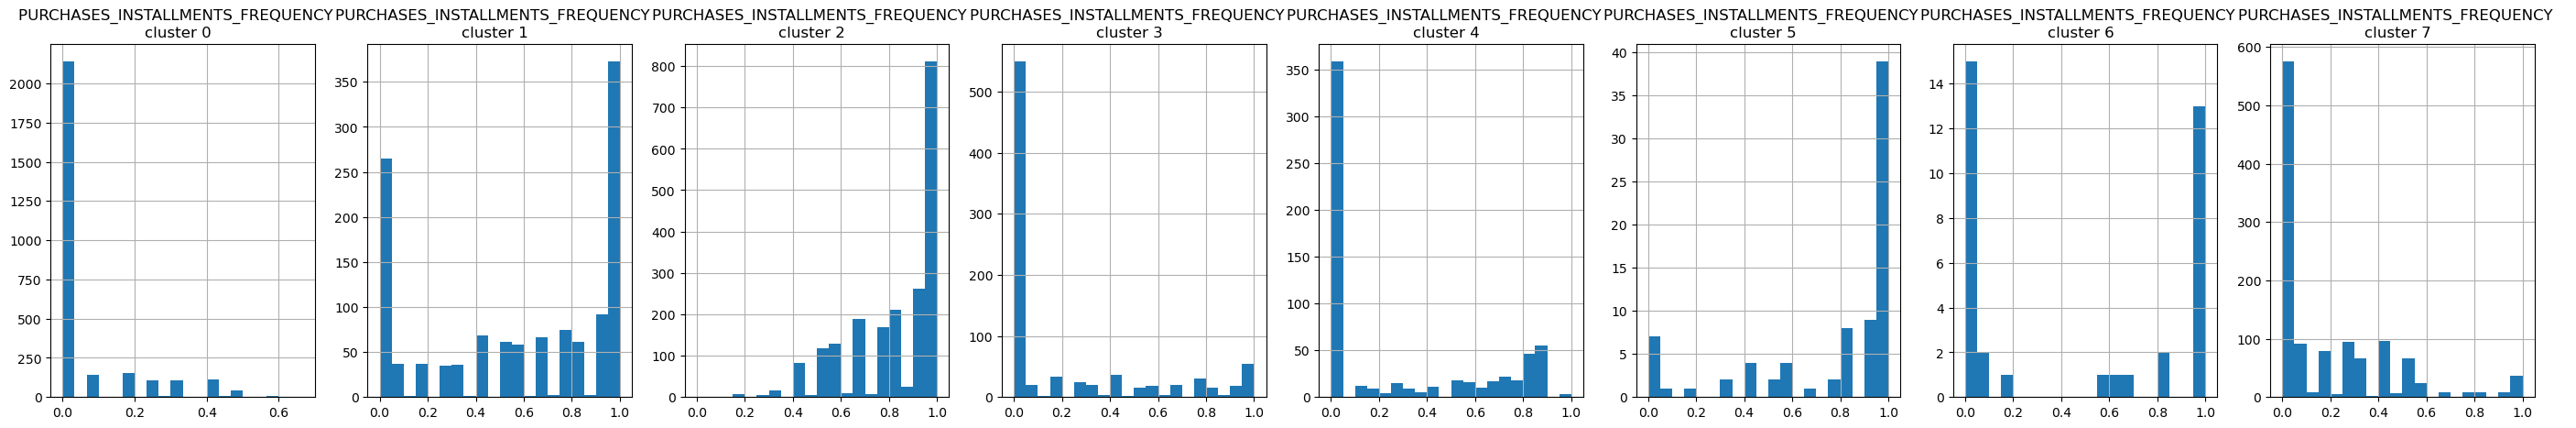

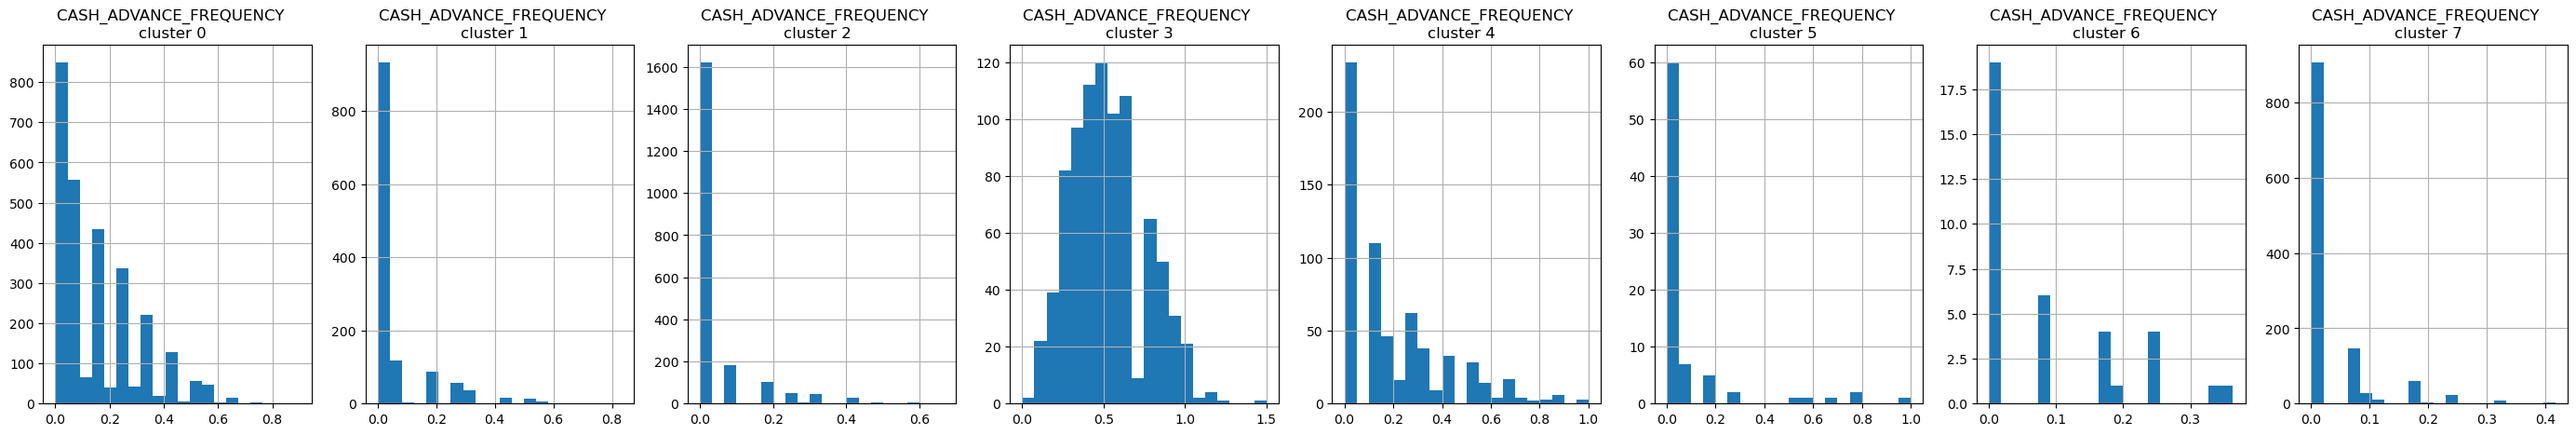

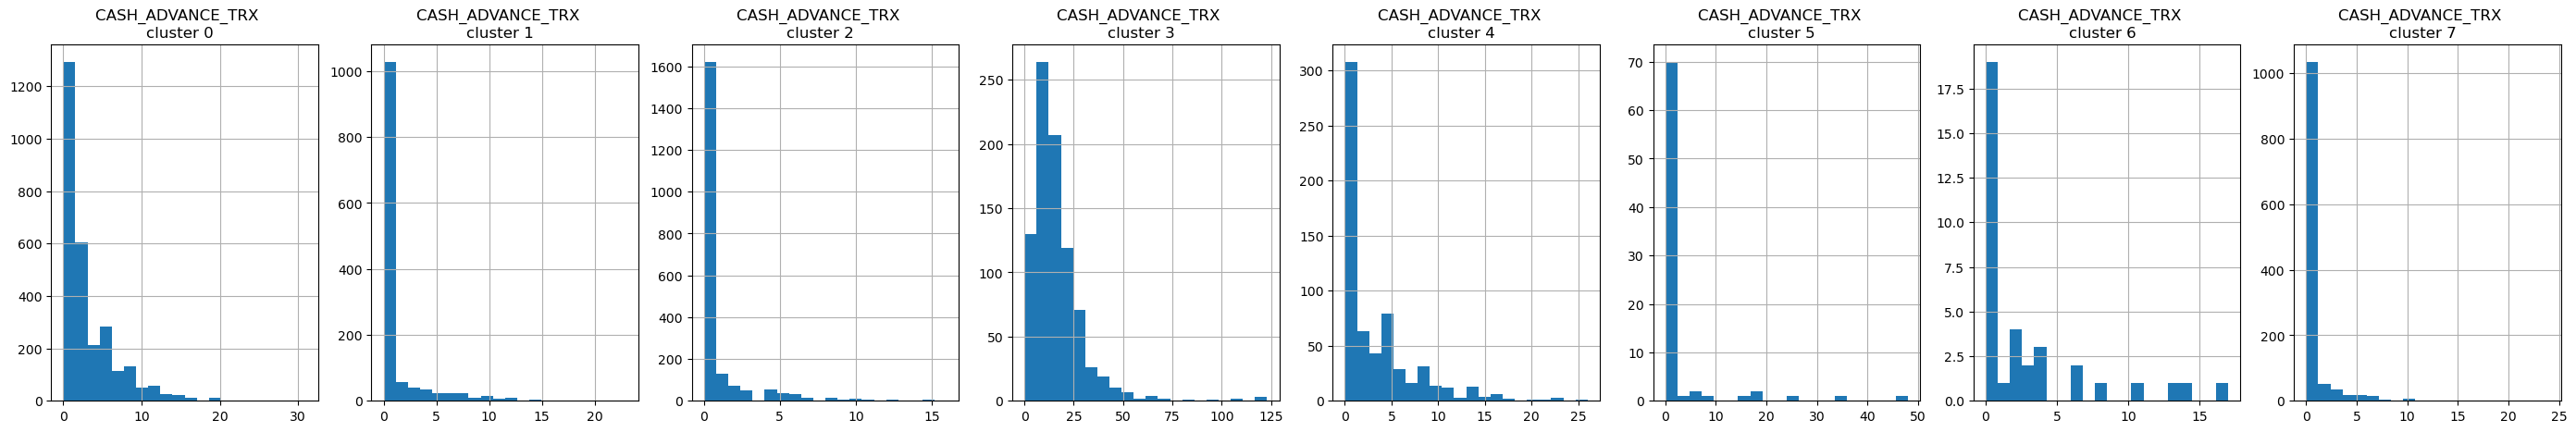

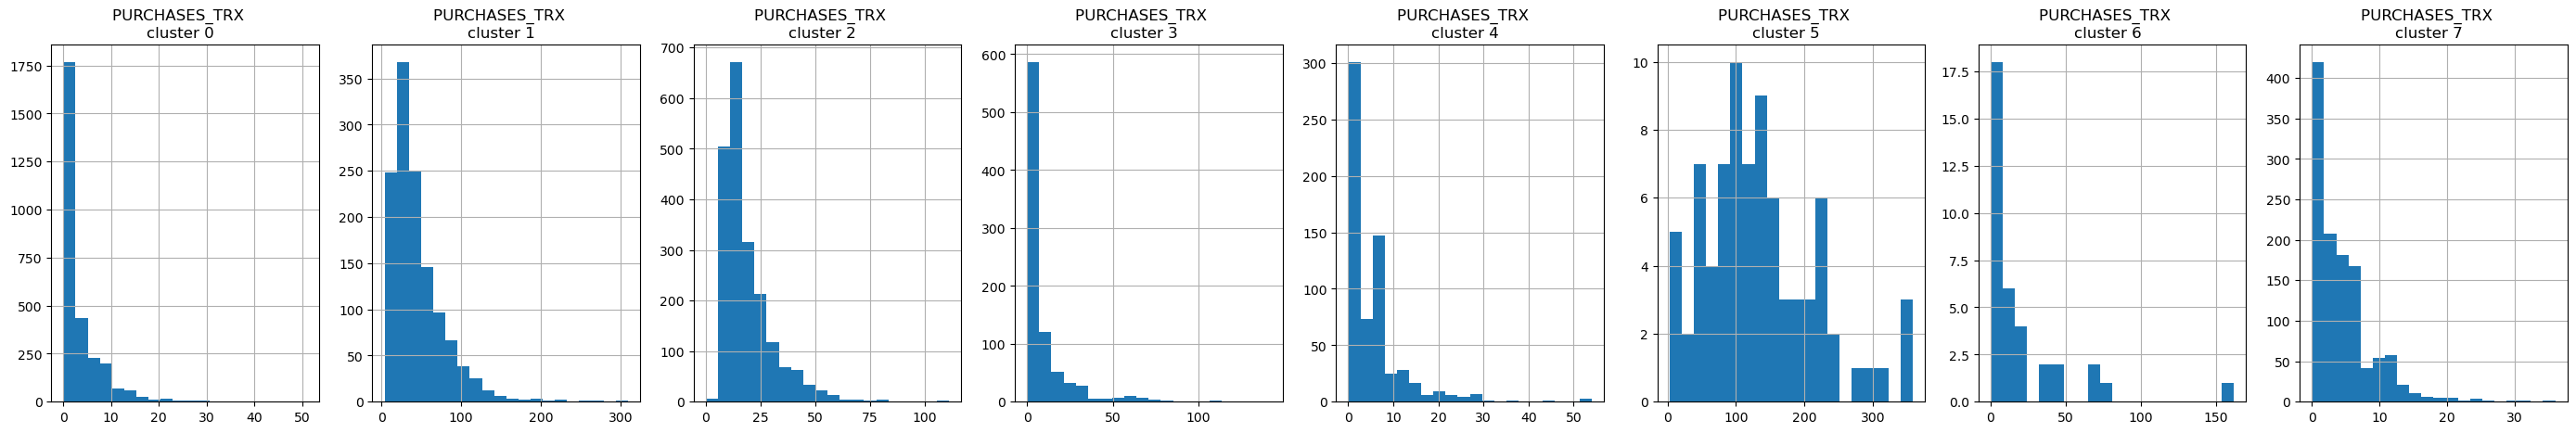

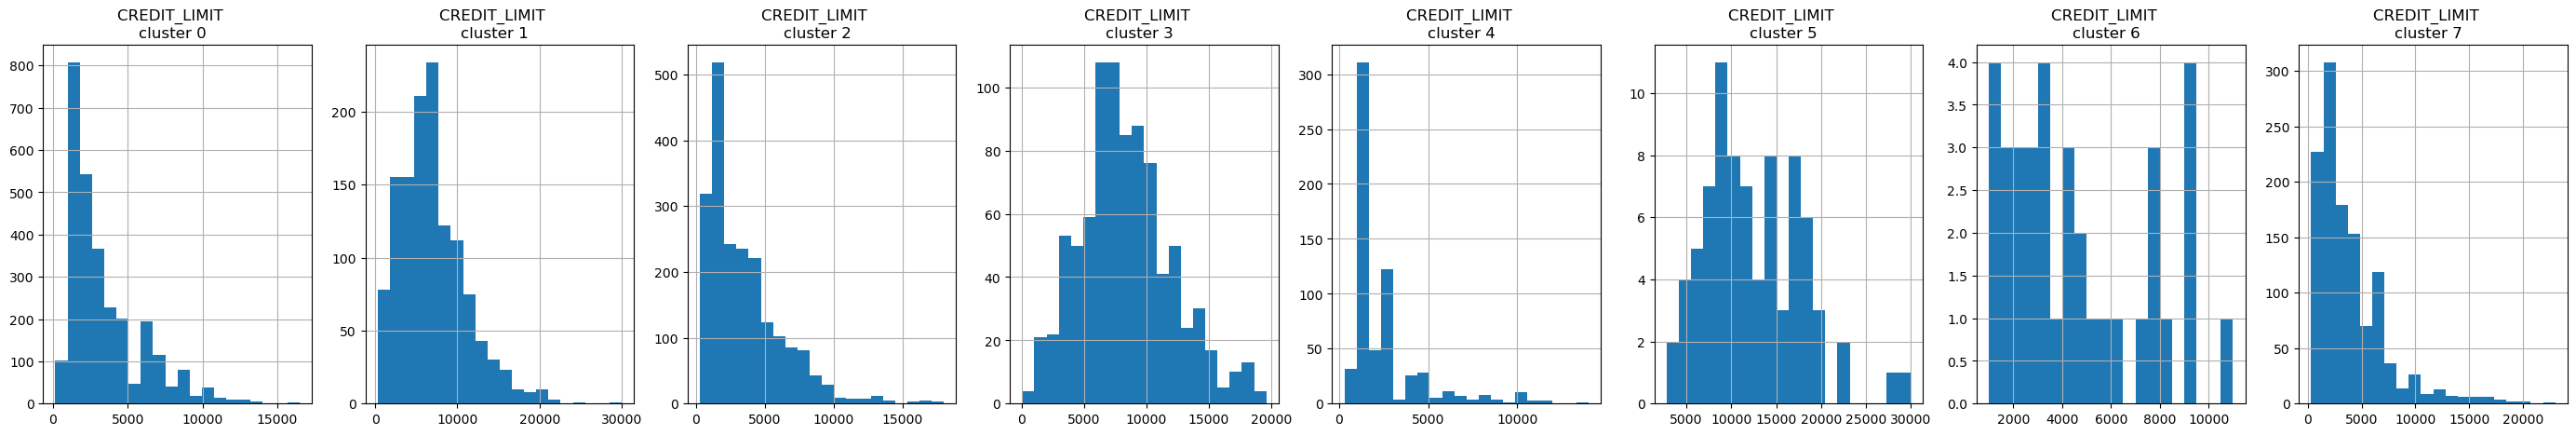

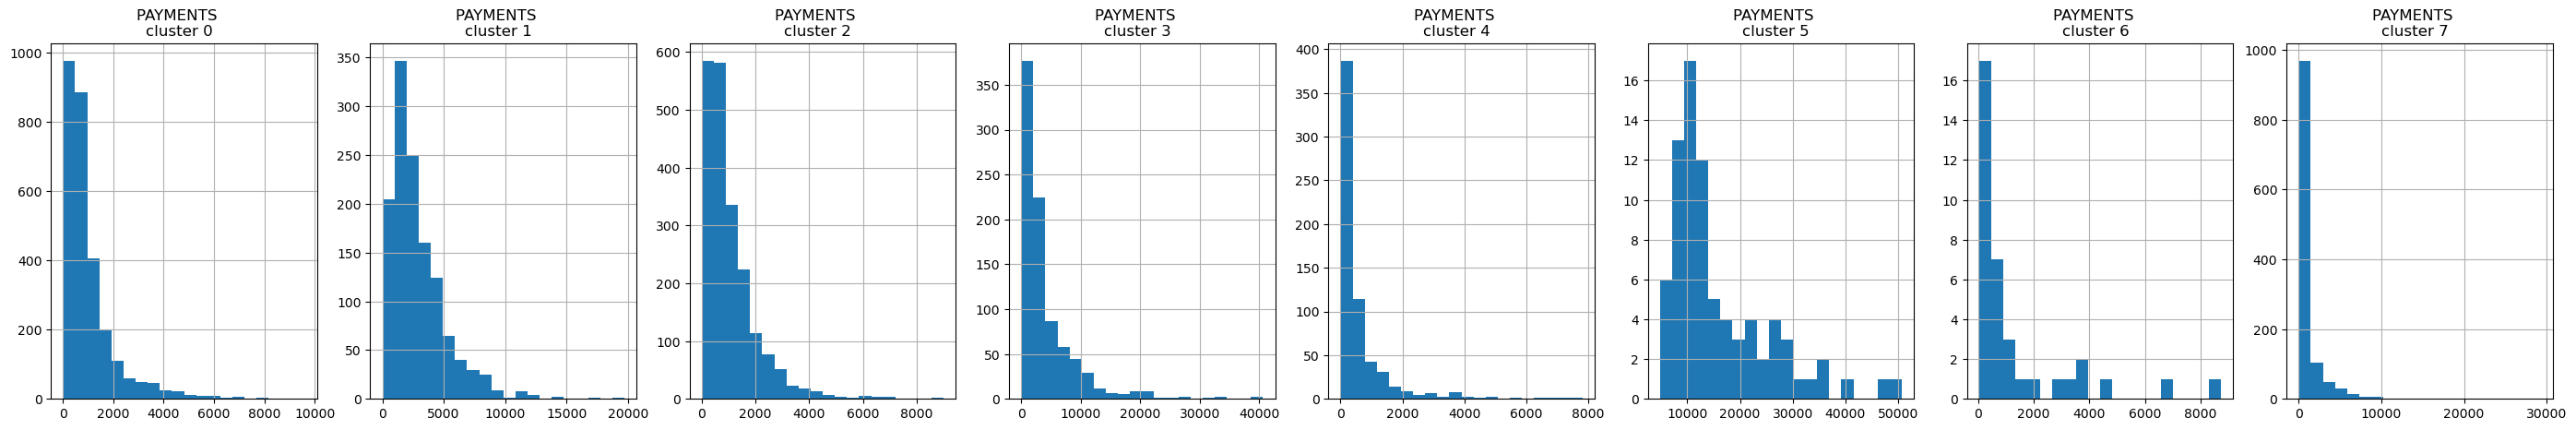

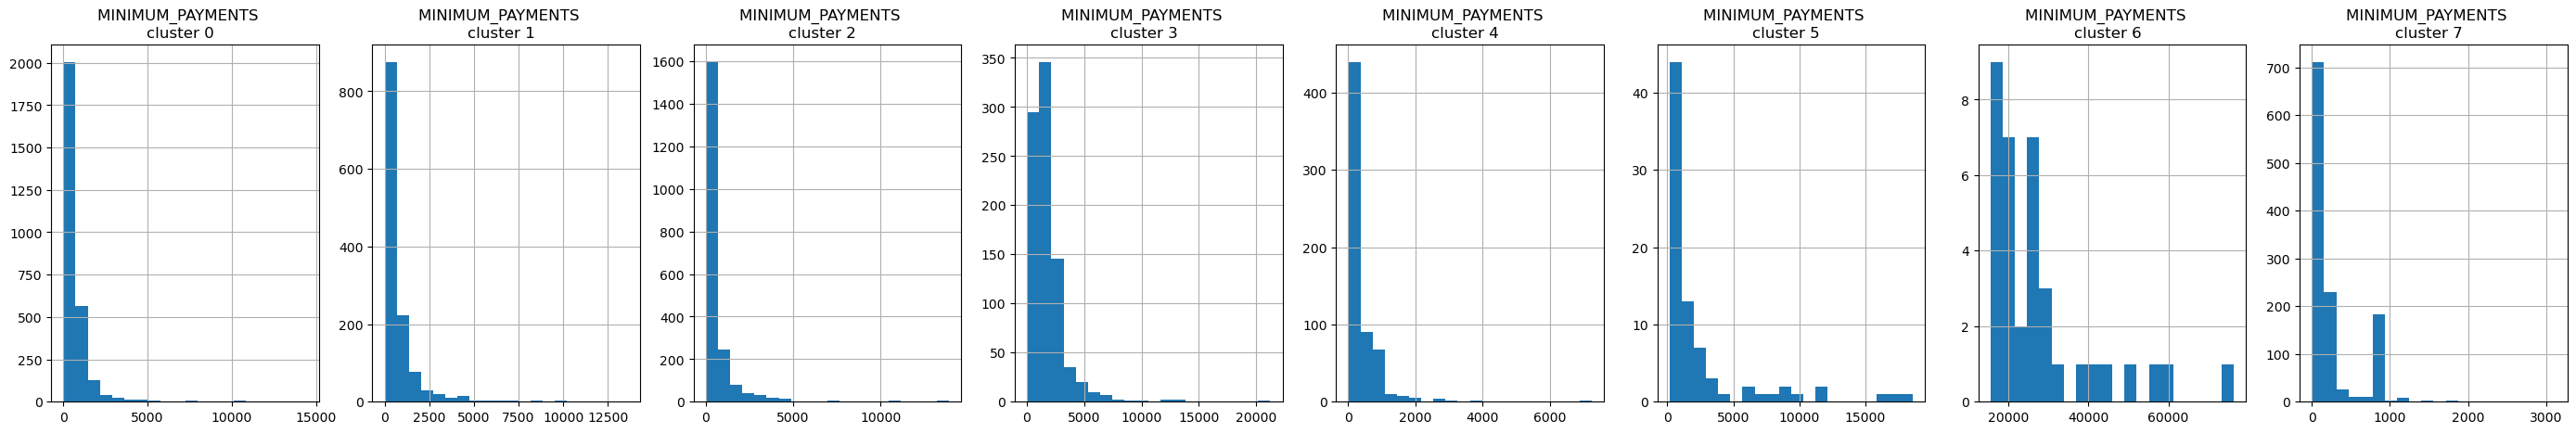

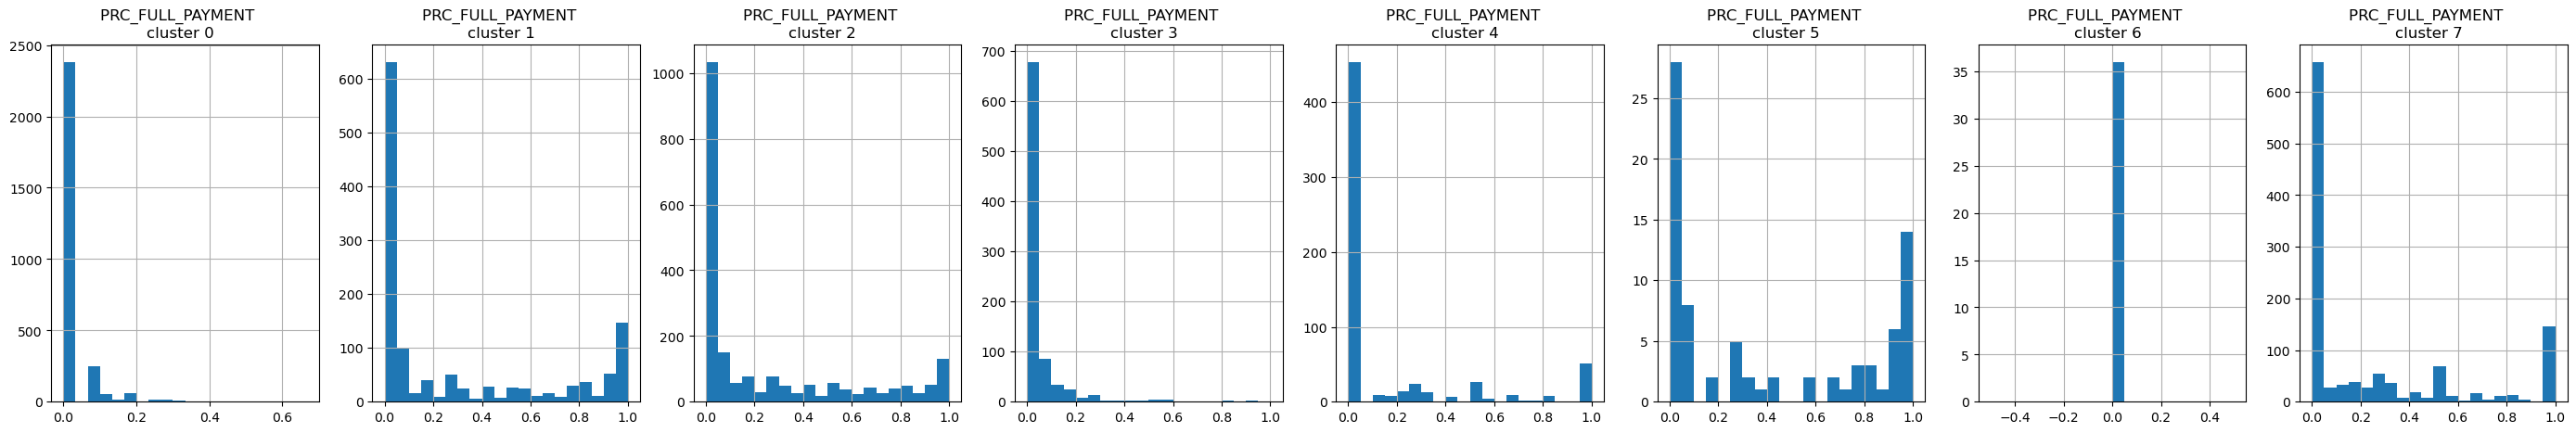

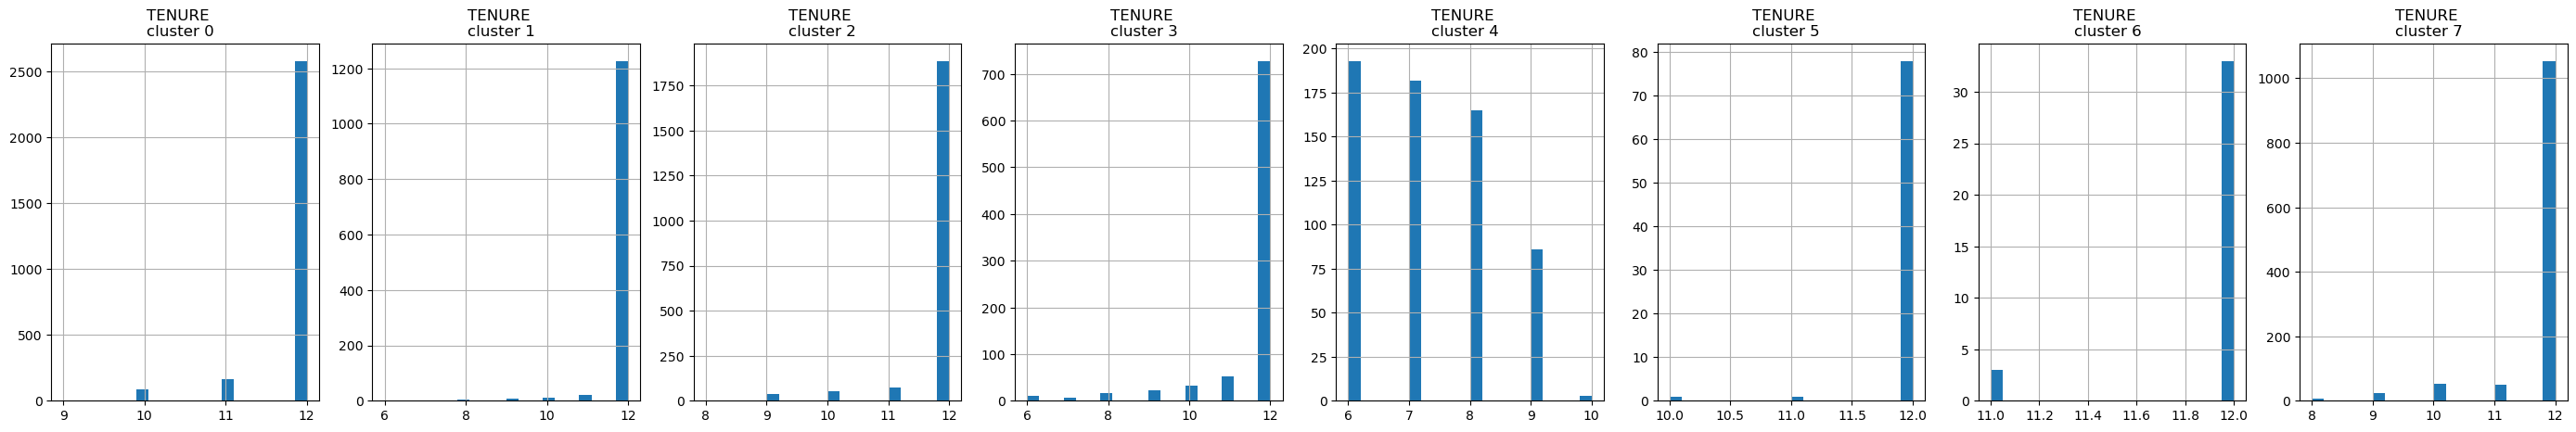

In [157]:
#one for loop for iterating columns
#another for loop for iterating clusters
for i in ds.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=ds_cluster[ds_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}   \ncluster {}  '.format(i,j))
    plt.show()#behavior

In [159]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(ds_scaled)
principal_comp#ouput is in array

array([[-1.68222007, -1.0764512 ],
       [-1.13829504,  2.50644729],
       [ 0.96968398, -0.38345493],
       ...,
       [-0.92620342, -1.81078572],
       [-2.33655143, -0.65797781],
       [-0.55642249, -0.40045547]])

In [160]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506447
2,0.969684,-0.383455
3,-0.873627,0.043166
4,-1.599434,-0.688582


In [161]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,0
1,-1.138295,2.506447,3
2,0.969684,-0.383455,1
3,-0.873627,0.043166,0
4,-1.599434,-0.688582,0


In [162]:
pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076451,0
1,-1.138295,2.506447,3
2,0.969684,-0.383455,1
3,-0.873627,0.043166,0
4,-1.599434,-0.688582,0
...,...,...,...
8945,-0.359629,-2.016149,4
8946,-0.564368,-1.639099,4
8947,-0.926203,-1.810786,4
8948,-2.336551,-0.657978,4


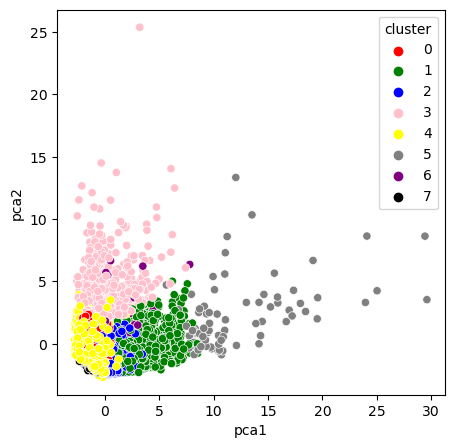

In [163]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.show()